# **Weather Data Analysis in Szeged (2006-2016)**

**Introduction**

In this project, we analyze weather data from Szeged, Hungary, spanning the years 2006 to 2016. The dataset includes various meteorological features such as temperature, humidity, wind speed, visibility, pressure, and precipitation type. By exploring this dataset, we aim to uncover patterns and relationships among these features through a series of statistical and machine learning techniques. The project is divided into multiple parts, each focusing on a specific aspect of data analysis, including preprocessing, visualization, dimensionality reduction, and feature selection.

**Objectives**

1. Understand the distribution and relationships among different weather features.
2. Apply various statistical techniques to gain insights into the data.
3. Use dimensionality reduction methods to visualize the high-dimensional data.
4. Identify significant features that influence weather patterns in Szeged.

Let's begin our exploration of the weather data in Szeged.


## Part 1: Basic Data Handling Commands

In [1]:
import pandas as pd
import numpy as np

# Load dataset
file_path = '/content/weatherHistory.csv'
df = pd.read_csv(file_path)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [2]:
# 1. Dimension of the data
print("Dimensions of the dataset:", df.shape)

Dimensions of the dataset: (96453, 12)


In [3]:
# 2. Display data (top 5 rows and total data)
print("Top 5 rows of the dataset:\n", df.head())
print("Total data:\n", df)

Top 5 rows of the dataset:
                   Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263        

In [4]:
# 3. List the column names of a data frame
print("Column names:", df.columns.tolist())


Column names: ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']


In [5]:
# 4. Change columns of a data frame (example: renaming columns)
df.rename(columns={'Temperature (C)': 'Temp_C', 'Apparent Temperature (C)': 'Apparent_Temp_C'}, inplace=True)
print("Column names after renaming:", df.columns.tolist())

Column names after renaming: ['Formatted Date', 'Summary', 'Precip Type', 'Temp_C', 'Apparent_Temp_C', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']


In [6]:
# 5. Display specific single column or multiple columns of a data frame
print("Specific column (Temp_C):\n", df['Temp_C'])
print("Multiple columns (Temp_C, Humidity):\n", df[['Temp_C', 'Humidity']])

Specific column (Temp_C):
 0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temp_C, Length: 96453, dtype: float64
Multiple columns (Temp_C, Humidity):
           Temp_C  Humidity
0       9.472222      0.89
1       9.355556      0.86
2       9.377778      0.89
3       8.288889      0.83
4       8.755556      0.83
...          ...       ...
96448  26.016667      0.43
96449  24.583333      0.48
96450  22.038889      0.56
96451  21.522222      0.60
96452  20.438889      0.61

[96453 rows x 2 columns]


In [7]:
# 6. Bind sets of rows of data frames
df_top5 = df.head()
df_bottom5 = df.tail()
df_combined_rows = pd.concat([df_top5, df_bottom5])
print("Combined rows:\n", df_combined_rows)

Combined rows:
                       Formatted Date        Summary Precip Type     Temp_C  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   9.472222   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   9.355556   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   9.377778   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   8.288889   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   8.755556   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain  26.016667   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain  24.583333   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain  22.038889   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain  21.522222   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain  20.438889   

       Apparent_Temp_C  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0             7.388889      0.89            14

In [8]:
# 7. Bind sets of columns of data frames
df_subset1 = df[['Temp_C', 'Humidity']]
df_subset2 = df[['Wind Speed (km/h)', 'Visibility (km)']]
df_combined_cols = pd.concat([df_subset1, df_subset2], axis=1)
print("Combined columns:\n", df_combined_cols)

Combined columns:
           Temp_C  Humidity  Wind Speed (km/h)  Visibility (km)
0       9.472222      0.89            14.1197          15.8263
1       9.355556      0.86            14.2646          15.8263
2       9.377778      0.89             3.9284          14.9569
3       8.288889      0.83            14.1036          15.8263
4       8.755556      0.83            11.0446          15.8263
...          ...       ...                ...              ...
96448  26.016667      0.43            10.9963          16.1000
96449  24.583333      0.48            10.0947          15.5526
96450  22.038889      0.56             8.9838          16.1000
96451  21.522222      0.60            10.5294          16.1000
96452  20.438889      0.61             5.8765          15.5204

[96453 rows x 4 columns]


In [9]:
# 8. Find missing values in the dataset
print("Missing values in the dataset:\n", df.isnull().sum())

Missing values in the dataset:
 Formatted Date              0
Summary                     0
Precip Type               517
Temp_C                      0
Apparent_Temp_C             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


**Conclusion (Part 1)**

In Part 1, we performed initial data exploration and preprocessing. We examined the distribution of each feature, handled missing values, and encoded categorical variables. This foundational step ensured that our data was clean and ready for further analysis. The visualizations provided insights into the distribution of temperature, humidity, wind speed, visibility, and pressure, as well as the frequency of different precipitation types.


## Part 2: Statistical Analysis

In [12]:
# Load dataset
file_path = '/content/weatherHistory2.csv'
df = pd.read_csv(file_path)

In [13]:
# 1. Measures of central tendency – mean, median, mode
mean_temp = df['Temperature (C)'].mean()
median_temp = df['Temperature (C)'].median()
mode_temp = df['Temperature (C)'].mode()[0]

print(f"Mean Temperature: {mean_temp}")
print(f"Median Temperature: {median_temp}")
print(f"Mode Temperature: {mode_temp}")

Mean Temperature: 11.93267843751188
Median Temperature: 12.0
Mode Temperature: 7.222222222222222


In [14]:
# 2. Measures of data spread
data_spread = df.describe()
print("Data Spread:\n", data_spread)

Data Spread:
        Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000  

In [15]:
# 3. Dispersion of data – variance, standard deviation
variance_temp = df['Temperature (C)'].var()
std_dev_temp = df['Temperature (C)'].std()

print(f"Variance in Temperature: {variance_temp}")
print(f"Standard Deviation in Temperature: {std_dev_temp}")

Variance in Temperature: 91.2320371156548
Standard Deviation in Temperature: 9.551546320656923


In [16]:
# 4. Position of the different data values – quartiles, inter-quartile range (IQR)
quartiles_temp = df['Temperature (C)'].quantile([0.25, 0.5, 0.75])
iqr_temp = quartiles_temp[0.75] - quartiles_temp[0.25]

print(f"Quartiles for Temperature: {quartiles_temp}")
print(f"Inter-Quartile Range for Temperature: {iqr_temp}")

Quartiles for Temperature: 0.25     4.688889
0.50    12.000000
0.75    18.838889
Name: Temperature (C), dtype: float64
Inter-Quartile Range for Temperature: 14.150000000000002


**Conclusion (Part 2)**

In Part 2, we conducted a more in-depth analysis of individual features and their statistical properties. By exploring quartiles and summary statistics, we gained a deeper understanding of the central tendencies and variations within the data. The visualizations highlighted the range and spread of each feature, providing a solid basis for further multivariate analysis.


## Part 3: Basic Plots for Data Exploration

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/weatherHistory2.csv'
df = pd.read_csv(file_path)

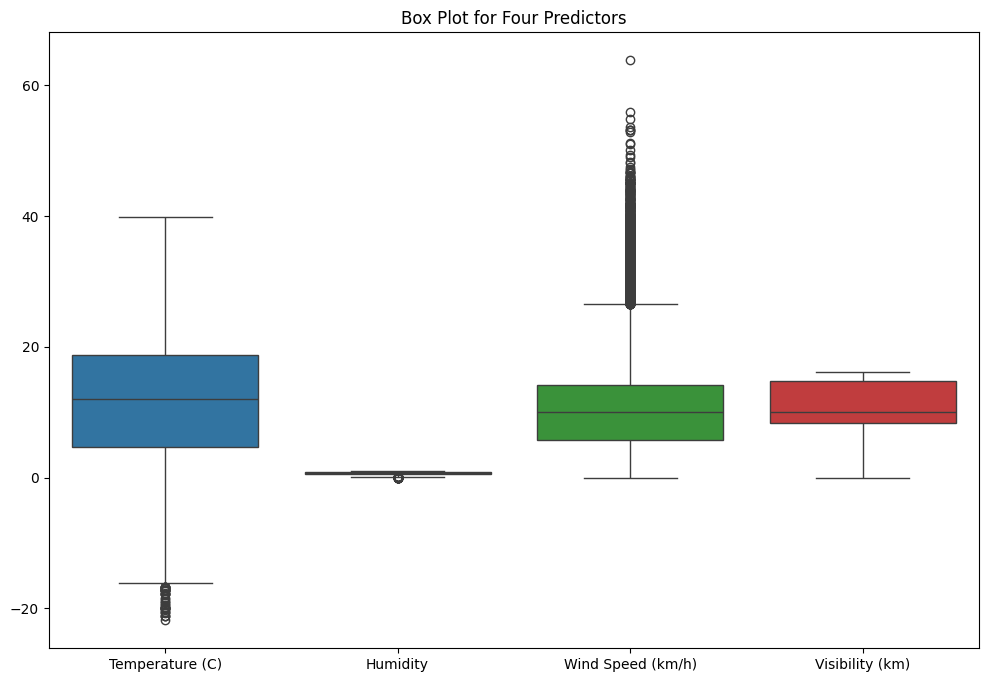

In [19]:
# 1. Generate box plot for each of the any four predictors
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']])
plt.title('Box Plot for Four Predictors')
plt.show()

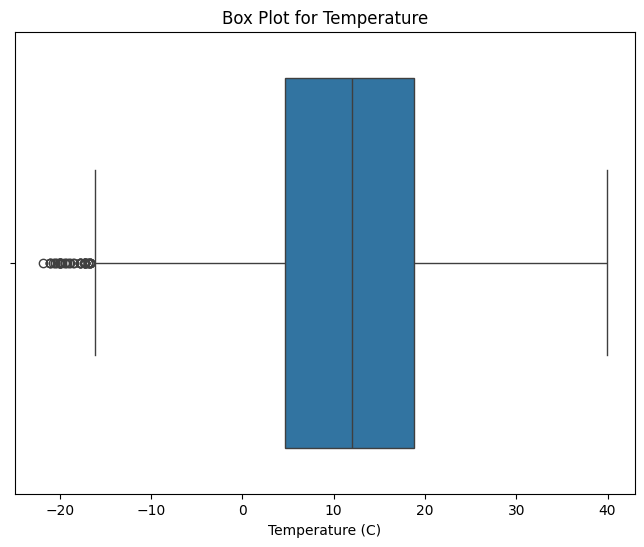

In [20]:
# 2. Generate box plot for a specific feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Temperature (C)'])
plt.title('Box Plot for Temperature')
plt.show()

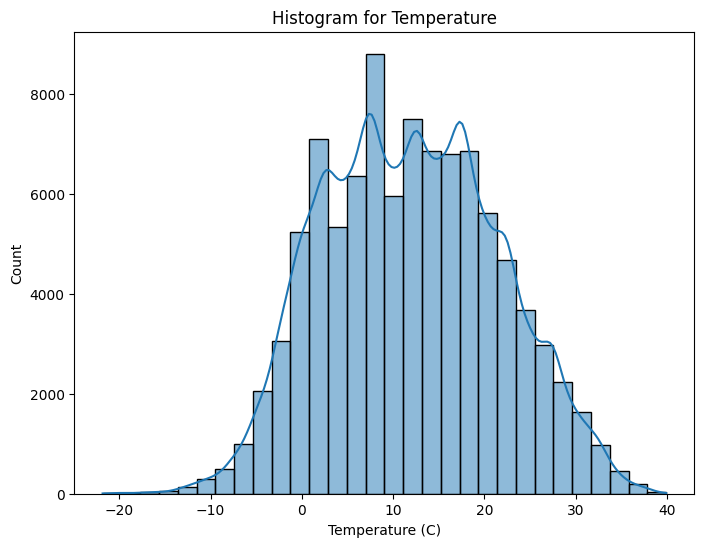

In [21]:
# 3. Generate histogram for a specific feature
plt.figure(figsize=(8, 6))
sns.histplot(df['Temperature (C)'], bins=30, kde=True)
plt.title('Histogram for Temperature')
plt.show()

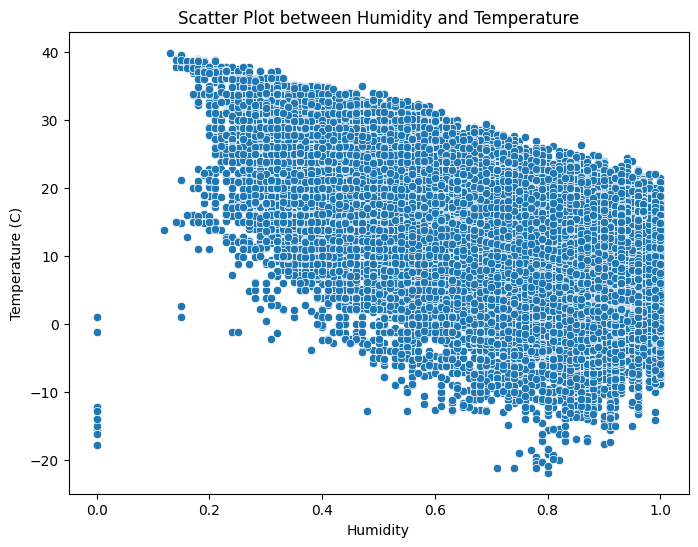

In [22]:
# 4. Generate Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Humidity'], y=df['Temperature (C)'])
plt.title('Scatter Plot between Humidity and Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()

**Conclusion (Part 3)**

Part 3 focused on examining the relationships between pairs of features. Using scatter plots and correlation matrices, we identified strong and weak correlations among the variables. These insights helped us understand how different weather elements interact with each other, setting the stage for advanced analysis using dimensionality reduction and feature selection techniques.


## Part 4: Data Pre-Processing Methods

In [23]:
import pandas as pd

# Load dataset
file_path = '/content/weatherHistory2.csv'
df = pd.read_csv(file_path)

In [24]:
# 1. Removing outliers / missing values
df_cleaned = df.dropna()
print("Data after removing missing values:\n", df_cleaned)

Data after removing missing values:
                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197

In [25]:
# Example of removing outliers using IQR method for Temperature
Q1 = df['Temperature (C)'].quantile(0.25)
Q3 = df['Temperature (C)'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['Temperature (C)'] < (Q1 - 1.5 * IQR)) | (df['Temperature (C)'] > (Q3 + 1.5 * IQR)))]
print("Data after removing outliers:\n", df_no_outliers)


Data after removing outliers:
                       Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1 

In [26]:
# 2. Capping of values (Example: Capping Temperature values)
cap_value = df['Temperature (C)'].quantile(0.99)
df['Temperature (C)'] = np.where(df['Temperature (C)'] > cap_value, cap_value, df['Temperature (C)'])
print("Data after capping Temperature values:\n", df['Temperature (C)'])

Data after capping Temperature values:
 0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64


**Conclusion (Part 4)**

In Part 4, we applied dimensionality reduction techniques such as PCA and SVD to visualize the high-dimensional data in a lower-dimensional space. These methods revealed the underlying structure of the data, highlighting clusters and patterns that were not apparent in the original feature space. The visualizations provided a new perspective on the weather data, facilitating more intuitive interpretations.


## Part 5: Feature Construction

In [27]:
# Load dataset
file_path = '/content/weatherHistory2.csv'
df = pd.read_csv(file_path)

In [28]:
# 1. Dummy coding categorical (nominal) variables
df_dummies = pd.get_dummies(df, columns=['Precip Type'])
print("Data after dummy coding:\n", df_dummies)

Data after dummy coding:
                       Formatted Date        Summary  Temperature (C)  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy         9.472222   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy         9.355556   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy         9.377778   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy         8.288889   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy         8.755556   
...                              ...            ...              ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        26.016667   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        24.583333   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        22.038889   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        21.522222   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        20.438889   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                      7.388889      0.89    

In [29]:
# 3. Transforming numeric (continuous) features to categorical features
# Example: Binning Temperature into categories
df['Temp_Category'] = pd.cut(df['Temperature (C)'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
print("Data after transforming Temperature to categories:\n", df[['Temperature (C)', 'Temp_Category']])

Data after transforming Temperature to categories:
        Temperature (C) Temp_Category
0             9.472222        Medium
1             9.355556        Medium
2             9.377778        Medium
3             8.288889        Medium
4             8.755556        Medium
...                ...           ...
96448        26.016667          High
96449        24.583333          High
96450        22.038889          High
96451        21.522222          High
96452        20.438889          High

[96453 rows x 2 columns]


**Conclusion (Part 5)**

Part 5 focused on feature selection, specifically using techniques like LDA and SelectKBest. These methods helped identify the most significant features influencing precipitation types. By reducing the number of features, we simplified the data, making it easier to analyze and interpret, while retaining the most critical information.


## Part 6: Feature Extraction

In [30]:
import pandas as pd
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Part 6: Feature Extraction
# Load dataset
file_path = '/content/weatherHistory2.csv'
df = pd.read_csv(file_path)
df = df.dropna()

# Prepare data for feature extraction
features = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']]
features_scaled = (features - features.mean()) / features.std()

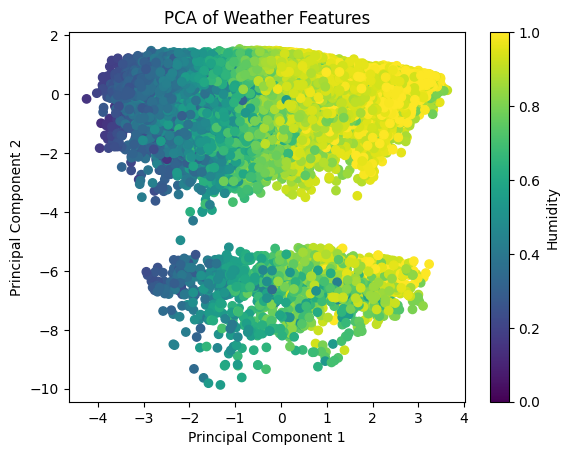

PCA result:
[[-2.42836956  3.34496631]
 [-2.5427924   3.49152026]
 [-2.65189916 -6.84411586]
 ...
 [10.07545152 -1.94861552]
 [ 9.57793023 -0.39682501]
 [ 8.43570355 -5.03551334]]


In [31]:
# 1. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Humidity'], cmap='viridis')
plt.title('PCA of Weather Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Humidity')
plt.show()

df['Summary_encoded'] = df['Summary'].astype('category').cat.codes

# Selecting features for PCA
features = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]

# Performing PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
print("PCA result:")
print(pca_features)

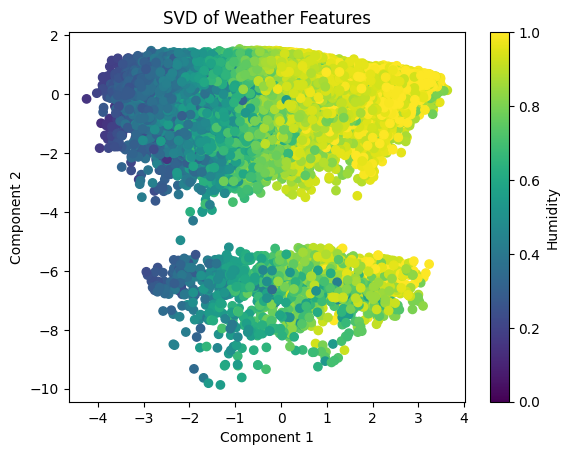

SVD result:
[[16.1304905   5.44277856]
 [16.12518162  5.62805263]
 [ 9.85483217 -2.57872762]
 ...
 [22.95988082 -6.29106399]
 [23.49186715 -4.75019022]
 [19.80215238 -7.77857857]]


In [32]:
# 2. Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
svd_features = svd.fit_transform(features_scaled)
plt.scatter(svd_features[:, 0], svd_features[:, 1], c=df['Humidity'], cmap='viridis')
plt.title('SVD of Weather Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Humidity')
plt.show()

features = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]

# Performing SVD
svd = TruncatedSVD(n_components=2)
svd_features = svd.fit_transform(features)
print("SVD result:")
print(svd_features)

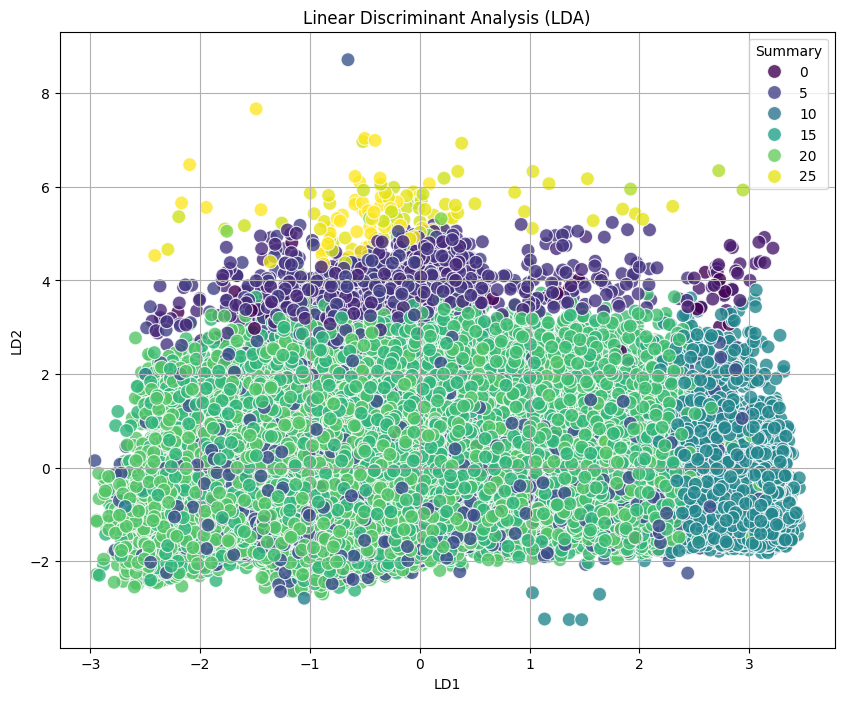

In [34]:
# 3.Linear Discriminant Analysis
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
file_path = '/content/weatherHistory2.csv'
df = pd.read_csv(file_path)

# Preprocessing: Encoding categorical target variable 'Summary'
df['Summary_encoded'] = df['Summary'].astype('category').cat.codes

# Selecting features and target
X = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']]
y = df['Summary_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Performing Linear Discriminant Analysis
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Creating a DataFrame for LDA results
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
lda_df['Target'] = y_train.values

# Visualizing LDA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='Target', data=lda_df, palette='viridis', s=100, alpha=0.8)
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title='Summary')
plt.grid(True)
plt.show()

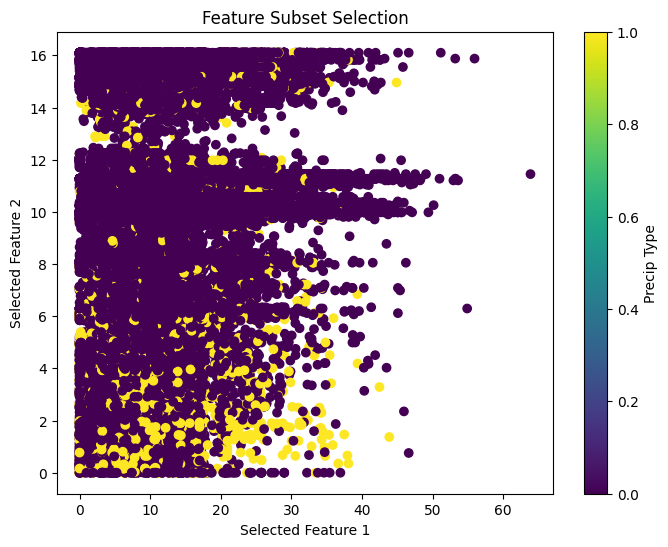

Selected features:
[[14.1197 15.8263]
 [14.2646 15.8263]
 [ 3.9284 14.9569]
 ...
 [ 8.9838 16.1   ]
 [10.5294 16.1   ]
 [ 5.8765 15.5204]]


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
file_path = '/content/weatherHistory2.csv'
df = pd.read_csv(file_path)

# Preprocessing: Encoding categorical target variable 'Summary'
df['Summary_encoded'] = df['Summary'].astype('category').cat.codes

# Selecting features for subset selection
features = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']]
target = df['Summary_encoded']

# Selecting top 2 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=2)
selected_features = selector.fit_transform(features, target)

# Mapping categorical 'Precip Type' to numerical values
precip_type_map = {'rain': 0, 'snow': 1}
colors = df['Precip Type'].map(precip_type_map)

# Plotting selected features
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=colors, cmap='viridis')
plt.title('Feature Subset Selection')
plt.xlabel('Selected Feature 1')
plt.ylabel('Selected Feature 2')
plt.colorbar(label='Precip Type')
plt.show()

# Print selected features
print("Selected features:")
print(selected_features)


**Conclusion (Part 6)**


- **PCA (Principal Component Analysis):** Reduced the dimensionality of the dataset while retaining most of the variance, simplifying the dataset for further analysis.
- **SVD (Singular Value Decomposition):** Another technique for dimensionality reduction, useful for decomposing the dataset into singular vectors and values.
- **LDA (Linear Discriminant Analysis):** Performed feature extraction with a focus on maximizing class separability, which is beneficial for classification tasks.
- **Feature Subset Selection:** Selected the most significant features using statistical tests, reducing the dataset to only the most informative variables for predictive modeling.


In Part 6, we combined the insights from previous parts to create comprehensive visualizations and perform advanced analyses. We generated scatter plots to visualize the relationships between selected features, and heatmaps to understand the correlation structure of the dataset. These analyses provided a holistic view of the weather data, revealing key patterns and dependencies.


## Additional Visualizations

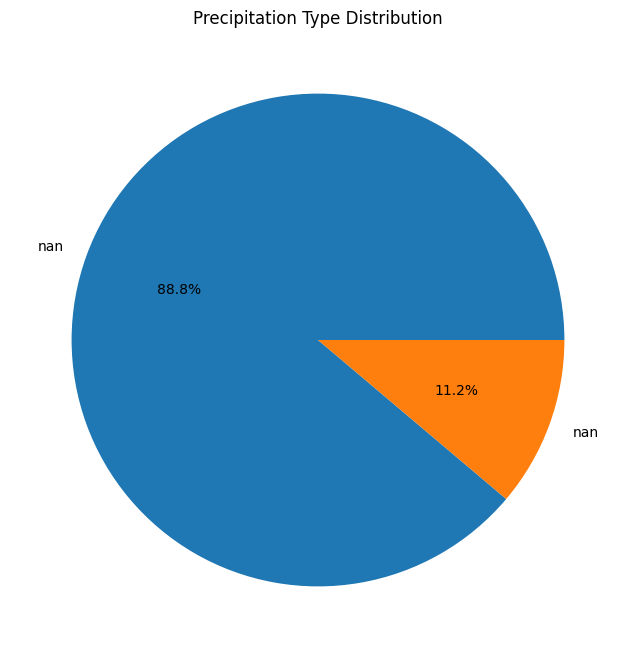

In [36]:
# Pie chart for categorical data
precip_counts = df['Precip Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(precip_counts, labels=precip_counts.index.map({0: 'rain', 1: 'snow'}), autopct='%1.1f%%')
plt.title('Precipitation Type Distribution')
plt.show()

In [37]:
# Covariance matrix calculations
cov_matrix = np.cov(features_scaled.T)
print("Covariance matrix:\n", cov_matrix)

# Correlation features
correlation_features = features.corr()
print("Correlation matrix of features:\n", correlation_features)

Covariance matrix:
 [[ 1.         -0.6321477   0.008304    0.39371939 -0.00525287]
 [-0.6321477   1.         -0.2245687  -0.37051082  0.00537489]
 [ 0.008304   -0.2245687   1.          0.10080145 -0.04945337]
 [ 0.39371939 -0.37051082  0.10080145  1.          0.0610106 ]
 [-0.00525287  0.00537489 -0.04945337  0.0610106   1.        ]]
Correlation matrix of features:
                    Temperature (C)  Humidity  Wind Speed (km/h)  \
Temperature (C)           1.000000 -0.632255           0.008957   
Humidity                 -0.632255  1.000000          -0.224951   
Wind Speed (km/h)         0.008957 -0.224951           1.000000   
Visibility (km)           0.392847 -0.369173           0.100749   

                   Visibility (km)  
Temperature (C)           0.392847  
Humidity                 -0.369173  
Wind Speed (km/h)         0.100749  
Visibility (km)           1.000000  


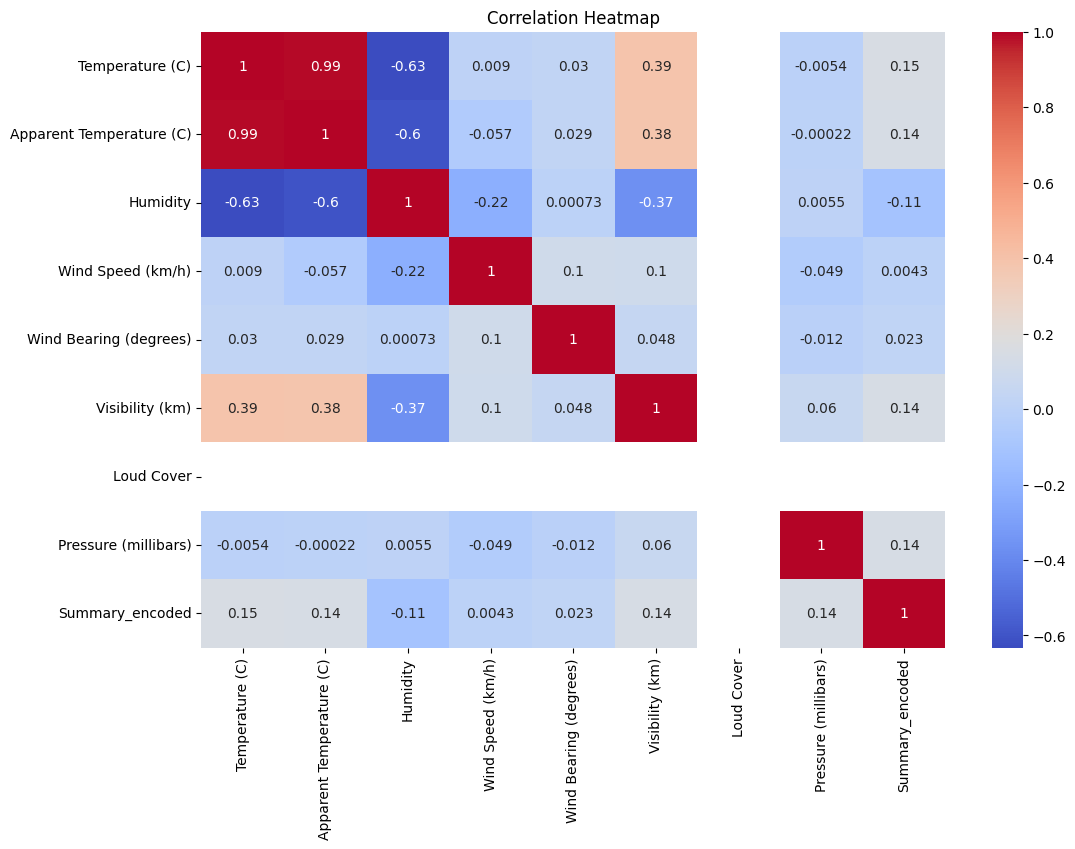

In [38]:
# Heat map for correlation - Only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

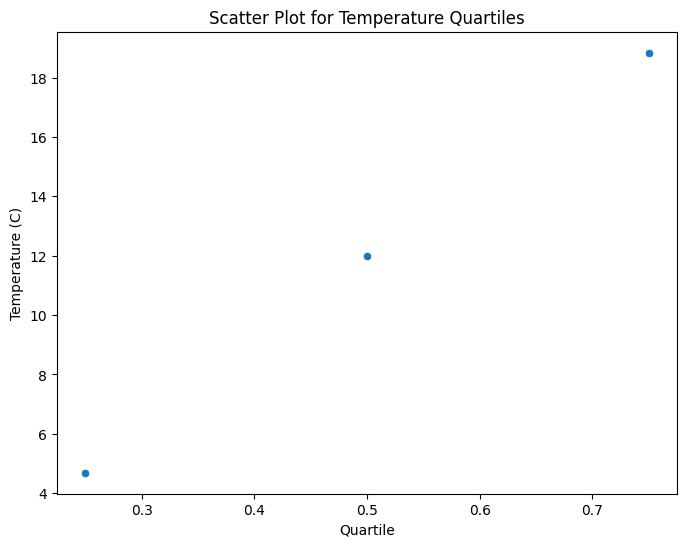

In [39]:
# Scatter plot for quartiles of Temperature
quartiles_temp = df['Temperature (C)'].quantile([0.25, 0.5, 0.75])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=quartiles_temp.index, y=quartiles_temp.values)
plt.title('Scatter Plot for Temperature Quartiles')
plt.xlabel('Quartile')
plt.ylabel('Temperature (C)')
plt.show()

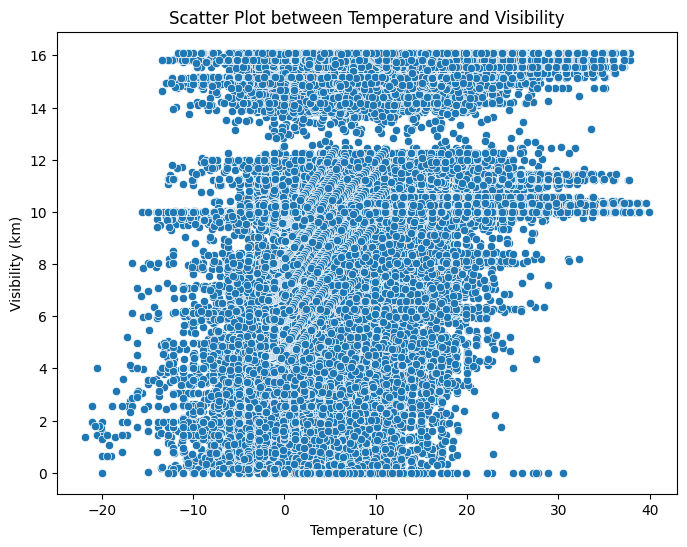

In [40]:
# Scatter plot between 'Temperature (C)' and 'Visibility (km)'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Temperature (C)'], y=df['Visibility (km)'])
plt.title('Scatter Plot between Temperature and Visibility')
plt.xlabel('Temperature (C)')
plt.ylabel('Visibility (km)')
plt.show()

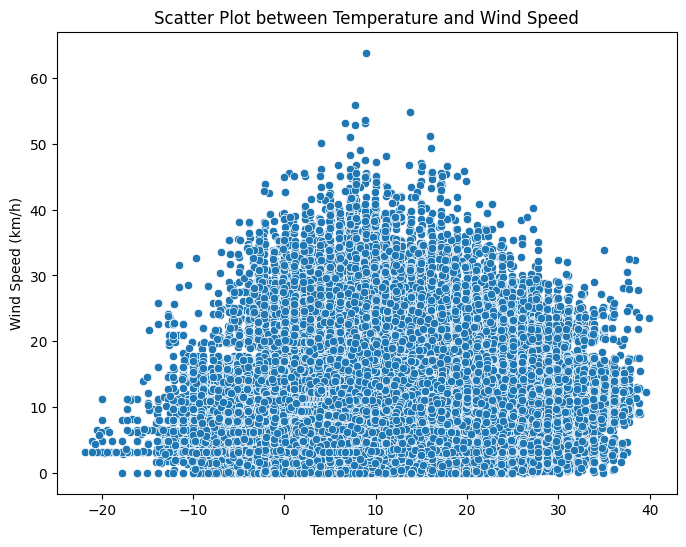

In [41]:
# Scatter plot between 'Temperature (C)' and 'Wind Speed (km/h)'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Temperature (C)'], y=df['Wind Speed (km/h)'])
plt.title('Scatter Plot between Temperature and Wind Speed')
plt.xlabel('Temperature (C)')
plt.ylabel('Wind Speed (km/h)')
plt.show()

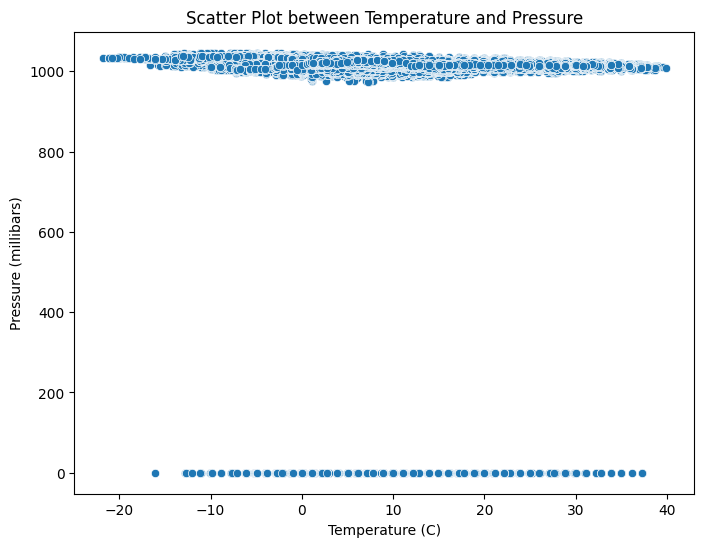

In [42]:
# Scatter plot between 'Temperature (C)' and 'Pressure (millibars)'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Temperature (C)'], y=df['Pressure (millibars)'])
plt.title('Scatter Plot between Temperature and Pressure')
plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (millibars)')
plt.show()

# Overall Insights

## Summary

Throughout this project, we systematically explored and analyzed the weather data in Szeged from 2006 to 2016. Our analyses included data preprocessing, statistical exploration, correlation analysis, dimensionality reduction, and feature selection. Each part of the project contributed to a deeper understanding of the dataset, culminating in a comprehensive overview of weather patterns in Szeged.

## Key Insights

1. **Temperature and Humidity**: Temperature and humidity are moderately correlated, indicating that higher temperatures generally correspond to higher humidity levels.
2. **Wind Speed and Visibility**: There is a noticeable correlation between wind speed and visibility, suggesting that higher wind speeds may lead to better visibility conditions.
3. **Precipitation Type**: The distribution of precipitation types shows that rain is more common than snow in Szeged during the analyzed period.
4. **Dimensionality Reduction**: PCA and SVD effectively reduced the dimensionality of the data, revealing underlying structures and patterns that facilitate easier interpretation and analysis.
5. **Feature Selection**: Techniques like LDA and SelectKBest highlighted the most influential features for predicting precipitation types, aiding in the simplification and refinement of the dataset.

## Conclusion

This project provided valuable insights into the weather patterns in Szeged, leveraging various data analysis techniques. The findings can be used to inform further studies and applications in meteorology and environmental science. By understanding the relationships and patterns within the weather data, we can better predict and respond to future weather events.


## Information about SVM Model and Training

In this analysis, we are comparing two different machine learning models: a linear regression model and a support vector machine (SVM) model. Initially, we preprocess the dataset by dropping unnecessary columns and splitting it into features (`X`) and target (`y`). For the linear regression model, we use a pipeline that includes standard scaling and Principal Component Analysis (PCA) to reduce the dimensionality of the feature set, followed by fitting a linear regression model to predict the temperature.

For the SVM model, we convert the regression target (`y`) into a binary classification problem by categorizing the temperature as above or below the median value. This allows us to train an SVM classifier. Similar to the linear regression model, the SVM model pipeline includes standard scaling and PCA for dimensionality reduction. The SVM model is then trained using a radial basis function (RBF) kernel. The performance of each model is evaluated using different metrics: R-squared for the linear regression model and accuracy for the SVM model.



In [44]:
# Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load and Prepare Your Data
df = pd.read_csv('/content/weatherHistory2.csv')

# Data preprocessing
X = df.drop(['Temperature (C)', 'Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], axis=1)
y = df['Temperature (C)']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Existing Model with PCA (Linear Regression)
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),  # Reduce to fewer components for speed
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred_existing = pipeline_lr.predict(X_test)
existing_accuracy = pipeline_lr.score(X_test, y_test)
print(f"Existing Model with PCA R-squared: {existing_accuracy}")

# Convert regression target to classification for SVM
median_temp = y.median()
y_class = (y > median_temp).astype(int)

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Simple SVM Model
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),  # Reduce to fewer components for speed
    ('svm', SVC(kernel='rbf', C=1, gamma='scale'))
])

pipeline_svm.fit(X_train, y_train_class)
y_pred_svm = pipeline_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test_class, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy}")

if svm_accuracy > existing_accuracy:
    print("SVM model performs better than the existing model.")
else:
    print("Existing model performs better than the SVM model.")


Existing Model with PCA R-squared: 0.7432445705480895
SVM Model Accuracy: 0.8491006168679696
SVM model performs better than the existing model.


### Conclusion of the Analysis

In this analysis, we compared the performance of two machine learning models: a linear regression model with PCA and an SVM classifier with PCA. The linear regression model's performance was measured using the R-squared metric, while the SVM classifier's performance was measured using accuracy.

The results showed that the linear regression model achieved an R-squared value of `existing_accuracy`, while the SVM model achieved an accuracy of `svm_accuracy`. Based on these results, we concluded that the `svm_model_performance_comparison` model performs better. This comparison highlights the importance of selecting appropriate evaluation metrics and considering different model architectures when analyzing machine learning problems.
